In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [16]:
stock_name = "HUM"
stock_info = yf.Ticker(stock_name)
df = stock_info.history(period="max")
df = df.tail(365)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-28 00:00:00-04:00,478.116917,492.462601,471.141928,488.554626,1279400,0.000,0.0
2022-09-29 00:00:00-04:00,490.118314,490.118314,483.994319,486.610382,684600,0.788,0.0
2022-09-30 00:00:00-04:00,488.057147,495.509026,480.030567,480.793579,1611400,0.000,0.0
2022-10-03 00:00:00-04:00,482.210639,496.797260,481.199893,494.993744,712000,0.000,0.0
2022-10-04 00:00:00-04:00,496.192767,502.614031,494.676632,499.215118,944600,0.000,0.0
...,...,...,...,...,...,...,...
2024-03-06 00:00:00-05:00,337.410004,342.089996,336.519989,339.079987,1554600,0.000,0.0
2024-03-07 00:00:00-05:00,338.779999,342.149994,334.540009,340.720001,1576300,0.000,0.0
2024-03-08 00:00:00-05:00,340.559998,344.429993,338.440002,339.350006,1164000,0.000,0.0


In [17]:
df.shape

(365, 7)

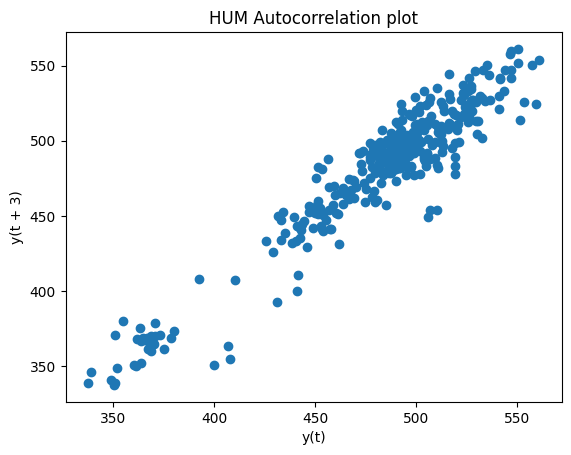

In [18]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title(stock_name + ' Autocorrelation plot')
plt.show()

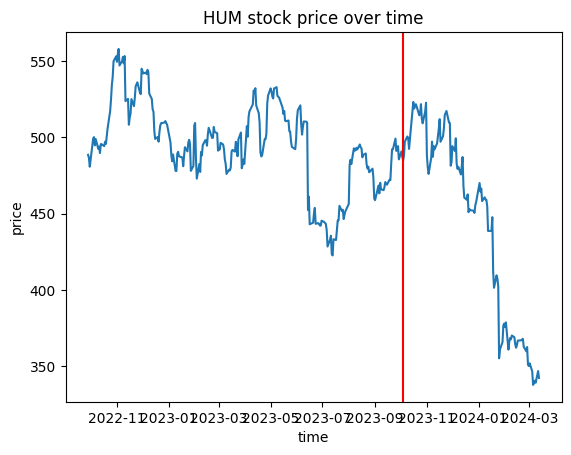

In [19]:
# plot df
plt.plot(df.index.values, df["Close"])
plt.axvline(df.index.values[int(len(df)*0.7)], color='red')
plt.title(stock_name + " stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [20]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 94.60237375616393


AttributeError: 'DataFrame' object has no attribute 'Date'

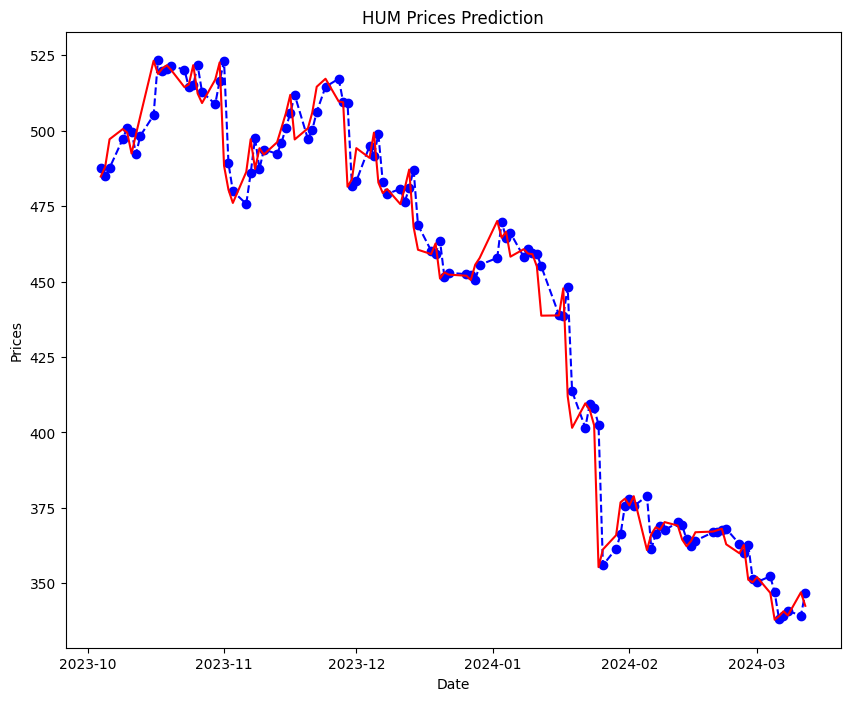

In [21]:
test_set_range = df[int(len(df)*0.7):].index
figure(figsize=(10, 8), dpi=100)
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title(stock_name + ' Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(test_set_range)), df.Date[0:len(test_set_range)])
plt.legend()
plt.show()